### Exploratory Analysis of the River data from Rao [2020]

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
reconstruction_data_path = '../data/Brahmaputra_JAS_reconstruction.csv'

reconstruction_data = pd.read_csv(reconstruction_data_path)

In [11]:
reconstruction_data.head()

,Year,p05,median,p95
0,1309,30694.306925,44405.980583,58058.848495
1,1310,32835.114121,46782.502185,60865.927333
2,1311,33491.880565,46981.688347,60473.777180
3,1312,31479.357370,45074.240744,58781.581813
4,1313,30149.227112,43662.147828,57204.973615


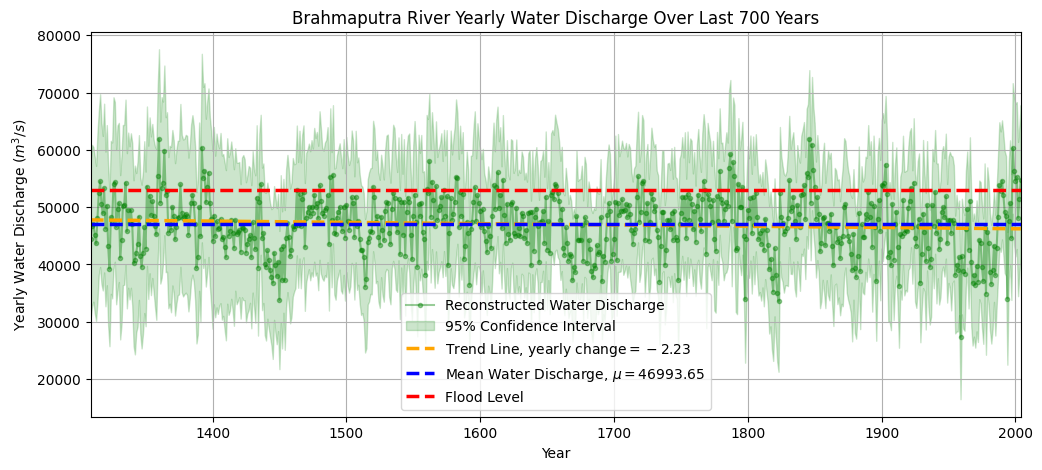

In [81]:
coef = np.polyfit(reconstruction_data["Year"],reconstruction_data["median"],1)
poly1d_fn = np.poly1d(coef) 

min_year = reconstruction_data['Year'].min()
max_year = reconstruction_data['Year'].max()

fig, ax = plt.subplots(figsize = (12, 5))

plt.plot(reconstruction_data['Year'], reconstruction_data['median'], "g.-", label = "Reconstructed Water Discharge", alpha=0.4)
plt.fill_between(reconstruction_data['Year'], reconstruction_data['p05'], reconstruction_data['p95'], color = "green", alpha = 0.2, label="95% Confidence Interval")
plt.plot(reconstruction_data['Year'], poly1d_fn(reconstruction_data['Year']), '--', color="orange", label = f"Trend Line, yearly change$={round(coef[0], 2)}$", linewidth = 2.5)
plt.axhline(y = reconstruction_data['median'].mean(), color = 'b', linestyle = '--', label = f"Mean Water Discharge, $\mu={round(reconstruction_data['median'].mean(), 2)}$", linewidth = 2.5)
plt.axhline(y = 53000, linestyle = "--", label = "Flood Level", color="red", linewidth = 2.5)
plt.xlabel('Year')
plt.ylabel('Yearly Water Discharge ($m^3/s$)')
plt.title('Brahmaputra River Yearly Water Discharge Over Last 700 Years')
plt.grid()
plt.margins(x=0)
plt.legend()
plt.show()

This is a good read @sarah:
- https://www.tandfonline.com/doi/abs/10.1080/02508069708686709
- https://news.climate.columbia.edu/2020/11/30/brahmaputra-river-floods-climate/

We see:
- Trend of water discharge over time is almost constant (less than 1% change over 700 years)
- River has always experience periods of floods (1350, 1850,  1980) and droughts (1450, 1820)
- More recently (last 50 years, strong increase), Major flooding events occurred in 1951, 1966, 1987, 1988, and 1998. Largest flooding in 1998 - highly unlikely that this is due to pure chance, more likely due to climate change.